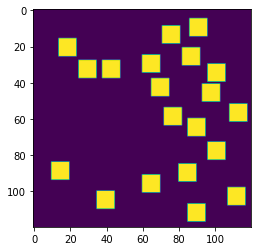

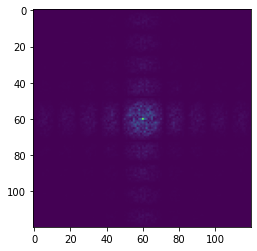

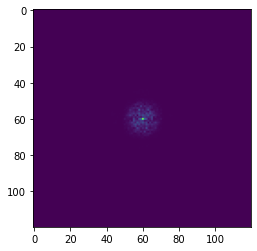

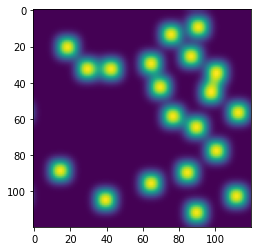

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ncols, nrows = 120, 120
sq_size, nsq = 10, 20

image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size - 1:, 1:-sq_size - 1:] = True

def place_square():
    valid_locs = np.transpose(np.nonzero(sq_locs))
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0, i-sq_size - 1), max(0, j-sq_size - 1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

for i in range(nsq):
    place_square()
plt.imshow(image)
plt.show()

ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))
plt.show()

sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, ncols)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax) ** 2 + ((Y - cy)/sigmay) ** 2))

ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep))
plt.show()

imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep))
plt.show()